In [1]:
import os
import sys

current_dir = os.getcwd()
print(f"Current working directory: {current_dir}") # DEBUG

project_root = os.path.abspath(os.path.join(current_dir, '..'))
print(f"Calculated project root: {project_root}") # DEBUG

if project_root not in sys.path:
    sys.path.append(project_root)
    print(f"Added project root to sys.path: {project_root}") # DEBUG

data_dir = os.path.join(project_root, 'data')
print(f"Calculated data directory: {data_dir}") # DEBUG

if not os.path.exists(data_dir):
    try:
        os.makedirs(data_dir)
        print(f"Successfully created directory: {data_dir}") # DEBUG
    except OSError as e:
        print(f"ERROR: Failed to create directory {data_dir}. Reason: {e}") # DEBUG
else:
    print(f"Directory already exists: {data_dir}") # DEBUG

Current working directory: c:\Users\asus\OneDrive\Desktop\projects\sentiment_analysis_project\notebook
Calculated project root: c:\Users\asus\OneDrive\Desktop\projects\sentiment_analysis_project
Added project root to sys.path: c:\Users\asus\OneDrive\Desktop\projects\sentiment_analysis_project
Calculated data directory: c:\Users\asus\OneDrive\Desktop\projects\sentiment_analysis_project\data
Directory already exists: c:\Users\asus\OneDrive\Desktop\projects\sentiment_analysis_project\data


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from src.vectorizer import TextVectorizer
from src.model_trainer import ModelTrainer
from src.evaluator import ModelEvaluator
import numpy as np
import pickle


In [ ]:

current_dir = os.getcwd()
project_root = os.path.abspath(os.path.join(current_dir, '..'))

if project_root not in sys.path:
    sys.path.append(project_root)

data_dir = os.path.join(project_root, 'data')
models_dir = os.path.join(project_root, 'models') #<<<<<< ADD THIS LINE

print(f"02 Notebook Calculated data directory: {data_dir}") # DEBUG
print(f"02 Notebook Calculated models directory: {models_dir}") # DEBUG <<<<<< ADD THIS LINE


file_to_load = os.path.join(data_dir, 'tweet_eval_sentiment_multiclass_preprocessed.csv')

print(f"02 Notebook Attempting to load data from: {file_to_load}")
if not os.path.exists(file_to_load):
    print(f"ERROR: File does not exist at {file_to_load}. This is unexpected given 01's output.")
    raise FileNotFoundError(f"Missing preprocessed data file: {file_to_load}")


if not os.path.exists(models_dir):
    try:
        os.makedirs(models_dir)
        print(f"Successfully created directory: {models_dir}")
    except OSError as e:
        print(f"ERROR: Failed to create models directory {models_dir}. Reason: {e}")
        
else:
    print(f"Models directory already exists: {models_dir}")
    




02 Notebook Calculated data directory: c:\Users\asus\OneDrive\Desktop\projects\sentiment_analysis_project\data
02 Notebook Calculated models directory: c:\Users\asus\OneDrive\Desktop\projects\sentiment_analysis_project\models
02 Notebook Attempting to load data from: c:\Users\asus\OneDrive\Desktop\projects\sentiment_analysis_project\data\tweet_eval_sentiment_multiclass_preprocessed.csv
Models directory already exists: c:\Users\asus\OneDrive\Desktop\projects\sentiment_analysis_project\models


In [4]:
# Load preprocessed data
df = pd.read_csv(file_to_load)
df['processed_text'].fillna('', inplace=True)
df['processed_text'] = df['processed_text'].astype(str)
df = df[df['processed_text'].str.strip() != ''].copy()

C:\Users\asus\AppData\Local\Temp\ipykernel_18672\1958818335.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['processed_text'].fillna('', inplace=True)


In [5]:
X= df['processed_text']
y= df['sentiment']

In [6]:

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Train samples: {len(X_train)}")
print(f"Test samples: {len(X_test)}")

#save y_test
with open(os.path.join(models_dir, 'y_test.pkl'), 'wb') as f:
    pickle.dump(y_test, f)
print("y_test saved for app.py")

Train samples: 47904
Test samples: 11976
y_test saved for app.py


In [7]:
#vectorization using tfidf
vectorizer = TextVectorizer()
X_train_tfidf = vectorizer.fit_transform_tfidf(X_train)
X_test_tfidf = vectorizer.transform_tfidf(X_test)

In [8]:
vectorizer.save_tfidf_vectorizer(os.path.join(models_dir, 'tfidf_vectorizer_multiclass.pkl'))

print(f"TF-IDF features shape (train): {X_train_tfidf.shape}")
print(f"TF-IDF features shape (test): {X_test_tfidf.shape}")

TF-IDF features shape (train): (47904, 5000)
TF-IDF features shape (test): (11976, 5000)


Logistic Regression model trained successfully.

--- Evaluation for Logistic Regression (TF-IDF) ---
Accuracy: 0.6496
Precision: 0.6529
Recall: 0.6496
F1-Score: 0.6438

Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.43      0.51      2275
           1       0.63      0.76      0.69      5493
           2       0.70      0.63      0.66      4208

    accuracy                           0.65     11976
   macro avg       0.65      0.60      0.62     11976
weighted avg       0.65      0.65      0.64     11976



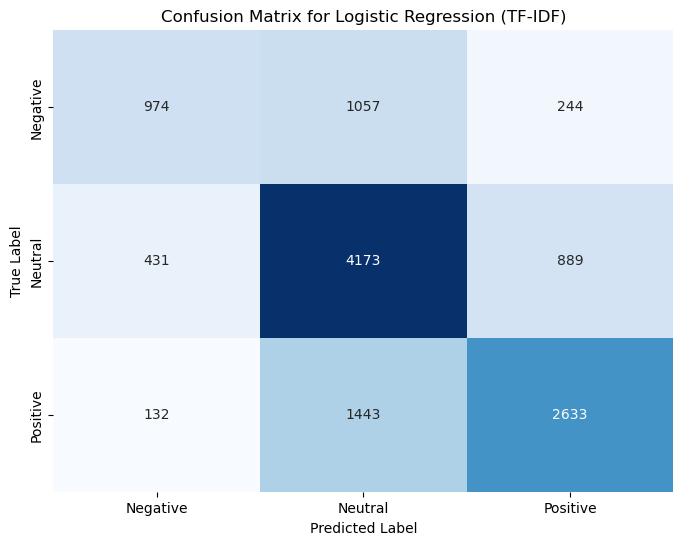

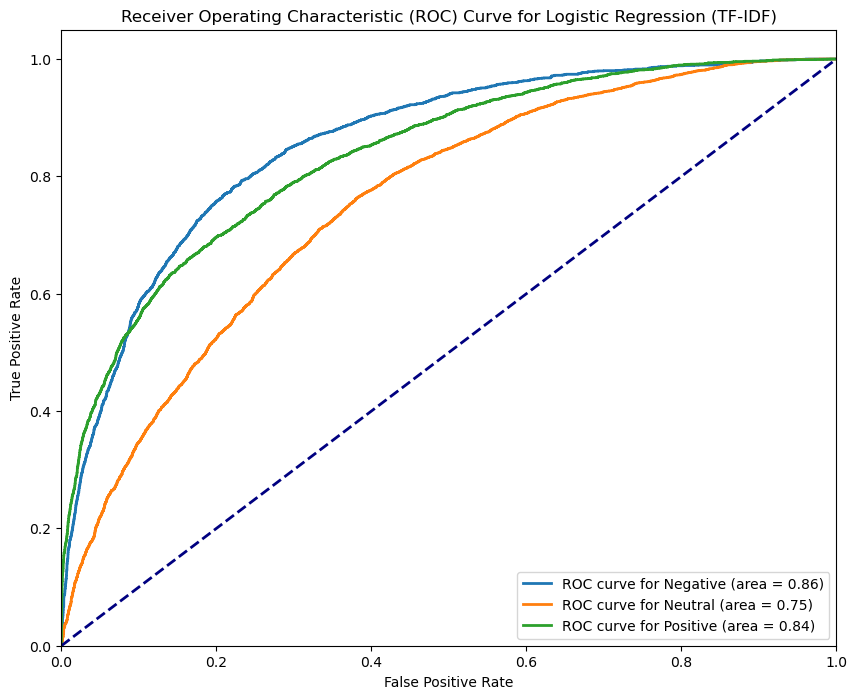

In [9]:
#model training (logistic regression)
lr_trainer = ModelTrainer()
lr_trainer.train_model(X_train_tfidf, y_train, model_type='logistic_regression')
lr_predictions = lr_trainer.predict(X_test_tfidf)
lr_probabilities = lr_trainer.predict_proba(X_test_tfidf)

#evaluation
evaluator = ModelEvaluator()
evaluator.evaluate(y_test, lr_predictions, lr_probabilities, model_name="Logistic Regression (TF-IDF)")

In [10]:
#save
lr_trainer.save_model(os.path.join(models_dir, 'logistic_regression_model_multiclass.pkl'))

Model saved to c:\Users\asus\OneDrive\Desktop\projects\sentiment_analysis_project\models\logistic_regression_model_multiclass.pkl


In [11]:
# Save LR evaluation data
with open(os.path.join(models_dir, 'logistic_regression_eval_data.pkl'), 'wb') as f:
    pickle.dump({'y_pred': lr_predictions, 'y_proba': lr_probabilities}, f)
print("Logistic Regression evaluation data saved.")

Logistic Regression evaluation data saved.


Random Forest model trained successfully.

--- Evaluation for Random Forest ---
Accuracy: 0.6174
Precision: 0.6232
Recall: 0.6174
F1-Score: 0.6058

Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.33      0.43      2275
           1       0.59      0.77      0.67      5493
           2       0.68      0.57      0.62      4208

    accuracy                           0.62     11976
   macro avg       0.62      0.56      0.57     11976
weighted avg       0.62      0.62      0.61     11976



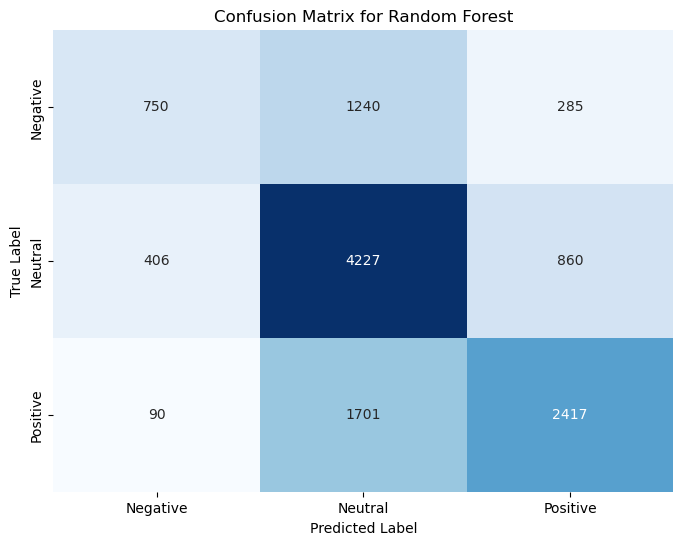

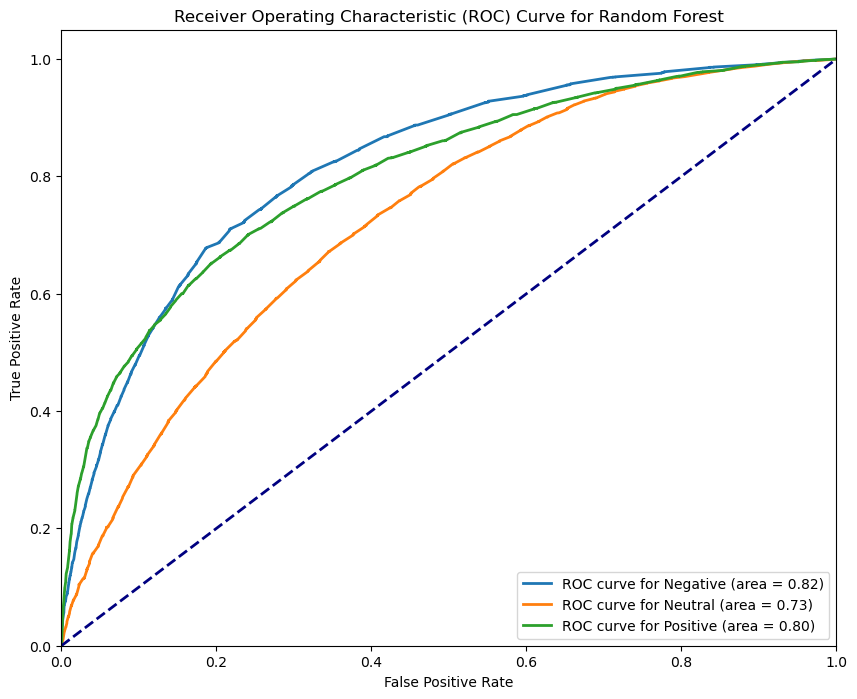

In [12]:
#model training(randon forest)

rf_trainer=ModelTrainer()
rf_trainer.train_model(X_train_tfidf,y_train, model_type='random_forest', n_estimators = 100)
rf_predictions = rf_trainer.predict(X_test_tfidf)
rf_probabilities = rf_trainer.predict_proba(X_test_tfidf)

#evaluate
evaluator.evaluate(y_test, rf_predictions, rf_probabilities, model_name="Random Forest")


In [13]:
#save
rf_trainer.save_model(os.path.join(models_dir, 'random_forest_model_multiclass.pkl'))

Model saved to c:\Users\asus\OneDrive\Desktop\projects\sentiment_analysis_project\models\random_forest_model_multiclass.pkl


In [14]:
# Save RF evaluation data
with open(os.path.join(models_dir, 'random_forest_eval_data.pkl'), 'wb') as f:
    pickle.dump({'y_pred': rf_predictions, 'y_proba': rf_probabilities}, f)
print("Random Forest evaluation data saved.")

Random Forest evaluation data saved.


In [15]:
# #model training (SVM)
# svm_trainer =ModelTrainer()
# svm_trainer.train_model(X_train_tfidf, y_train, model_type='svm', C=1.0, kernel='linear')
# svm_predictions = svm_trainer.predict(X_test_tfidf)
# svm_probabilities = svm_trainer.predict_proba(X_test_tfidf)

# #evaluate
# evaluator.evaluate(y_test, svm_predictions,svm_probabilities, model_name="SVM")

Linear Svc model trained successfully.

--- Evaluation for Linear SVM ---
Accuracy: 0.6461
Precision: 0.6464
Recall: 0.6461
F1-Score: 0.6425

Classification Report:
              precision    recall  f1-score   support

           0       0.61      0.46      0.53      2275
           1       0.63      0.73      0.68      5493
           2       0.68      0.63      0.66      4208

    accuracy                           0.65     11976
   macro avg       0.64      0.61      0.62     11976
weighted avg       0.65      0.65      0.64     11976



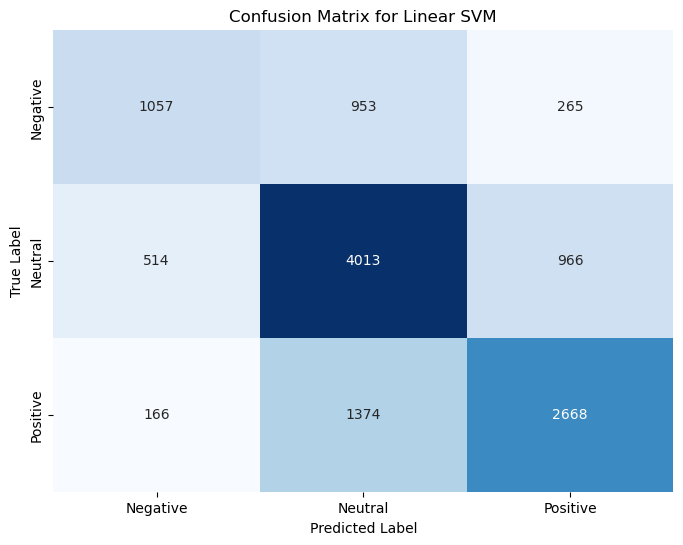

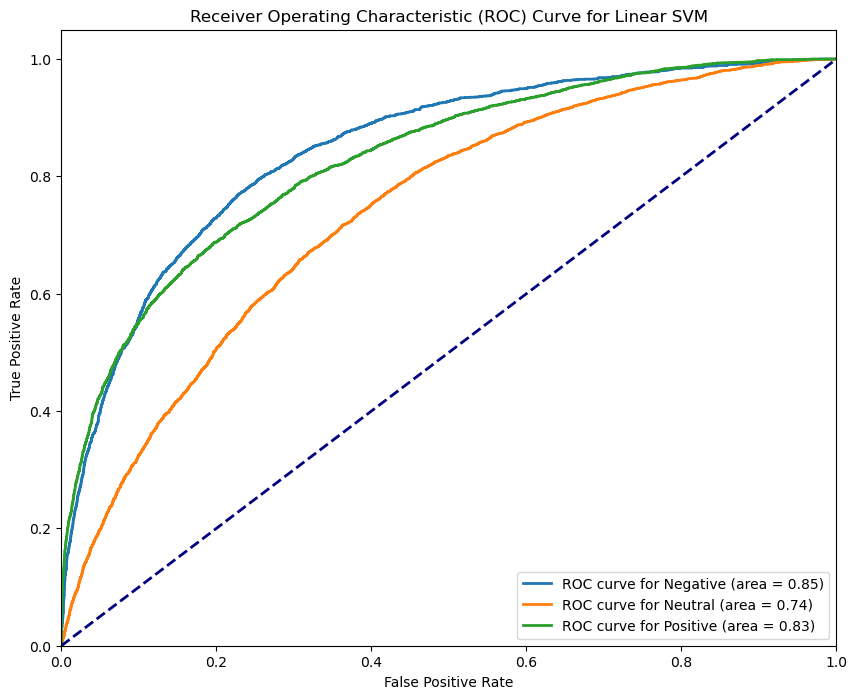

Model saved to c:\Users\asus\OneDrive\Desktop\projects\sentiment_analysis_project\models\linear_svc_model_multiclass.pkl
Linear SVM evaluation data saved.


In [16]:
linear_svc_trainer = ModelTrainer()
linear_svc_trainer.train_model(X_train_tfidf, y_train, model_type='linear_svc', C=1.0)
linear_svc_predictions = linear_svc_trainer.predict(X_test_tfidf)
linear_svc_decisions = linear_svc_trainer.predict_proba(X_test_tfidf)
evaluator.evaluate(y_test, linear_svc_predictions, linear_svc_decisions, model_name="Linear SVM")
linear_svc_trainer.save_model(os.path.join(models_dir, 'linear_svc_model_multiclass.pkl'))
# Save Linear SVM evaluation data
with open(os.path.join(models_dir, 'linear_svc_eval_data.pkl'), 'wb') as f:
    pickle.dump({'y_pred': linear_svc_predictions, 'y_proba': linear_svc_decisions}, f)
print("Linear SVM evaluation data saved.")




In [17]:
# #save
# linear_svc_trainer.save_model(os.path.join(models_dir, 'linear_svm_model_multiclass.pkl'))

In [18]:
# with open(os.path.join(models_dir, 'rf_eval_data.pkl'), 'wb') as f:
#     pickle.dump({'y_pred': rf_predictions, 'y_proba': rf_probabilities}, f)
# print("RF evaluation data saved.")

In [19]:
tokenized_corpus = [text.split() for text in X_train]

word2vec_vectorizer = TextVectorizer()
word2vec_vectorizer.train_word2vec(tokenized_corpus)
word2vec_vectorizer.save_word2vec_model(os.path.join(models_dir, 'word2vec_model_multiclass.bin'))

In [20]:
X_train_w2v = np.array([word2vec_vectorizer.get_sentence_embedding(text.split()) for text in X_train])
X_test_w2v = np.array([word2vec_vectorizer.get_sentence_embedding(text.split()) for text in X_test])

print(f"Word2Vec features shape (train): {X_train_w2v.shape}")
print(f"Word2Vec features shape (test): {X_test_w2v.shape}")


Word2Vec features shape (train): (47904, 100)
Word2Vec features shape (test): (11976, 100)


Logistic Regression model trained successfully.

--- Evaluation for Logistic Regression (Word2Vec) ---
Accuracy: 0.5798
Precision: 0.5793
Recall: 0.5798
F1-Score: 0.5663

Classification Report:
              precision    recall  f1-score   support

           0       0.53      0.27      0.36      2275
           1       0.56      0.72      0.63      5493
           2       0.63      0.57      0.59      4208

    accuracy                           0.58     11976
   macro avg       0.57      0.52      0.53     11976
weighted avg       0.58      0.58      0.57     11976



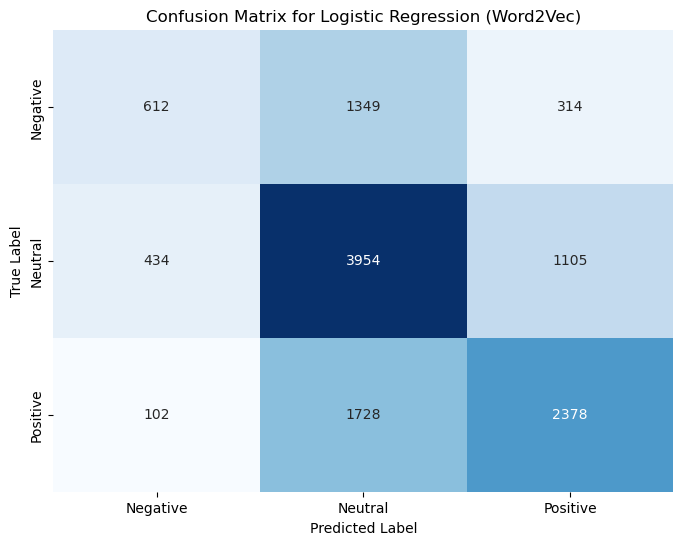

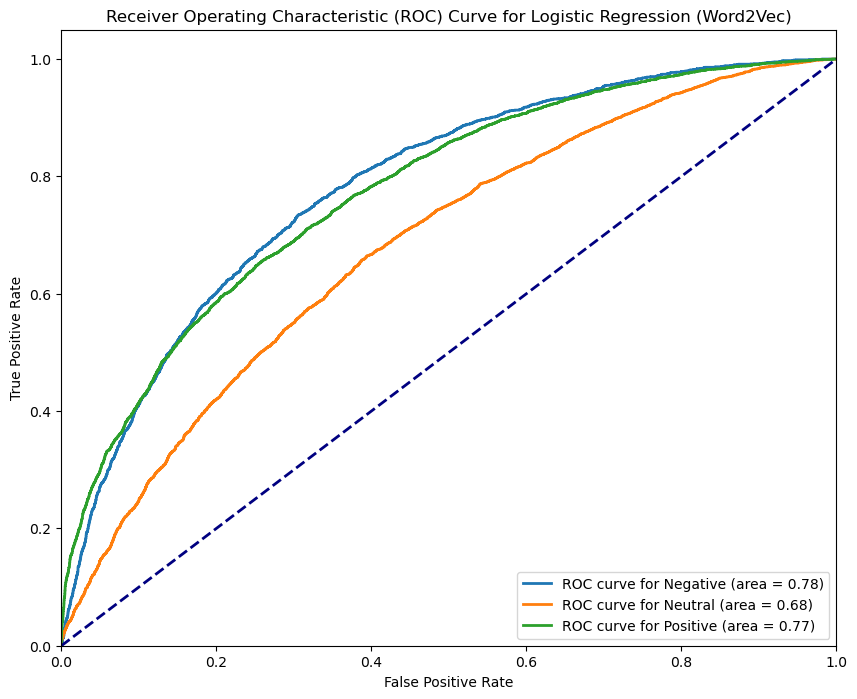

In [21]:
lr_w2v_trainer = ModelTrainer()
lr_w2v_trainer.train_model(X_train_w2v, y_train, model_type='logistic_regression')
lr_w2v_predictions = lr_w2v_trainer.predict(X_test_w2v)
lr_w2v_probabilities = lr_w2v_trainer.predict_proba(X_test_w2v)

#evaluate
evaluator.evaluate(y_test, lr_w2v_predictions, lr_w2v_probabilities, model_name="Logistic Regression (Word2Vec)")


In [22]:
lr_w2v_trainer.save_model(os.path.join(models_dir, 'logistic_regression_w2v_model_multiclass.pkl'))

Model saved to c:\Users\asus\OneDrive\Desktop\projects\sentiment_analysis_project\models\logistic_regression_w2v_model_multiclass.pkl


Random Forest model trained successfully.

--- Evaluation for Random Forest (Word2Vec) ---
Accuracy: 0.5831
Precision: 0.5845
Recall: 0.5831
F1-Score: 0.5693

Classification Report:
              precision    recall  f1-score   support

           0       0.58      0.27      0.37      2275
           1       0.57      0.71      0.63      5493
           2       0.61      0.59      0.60      4208

    accuracy                           0.58     11976
   macro avg       0.59      0.52      0.53     11976
weighted avg       0.58      0.58      0.57     11976



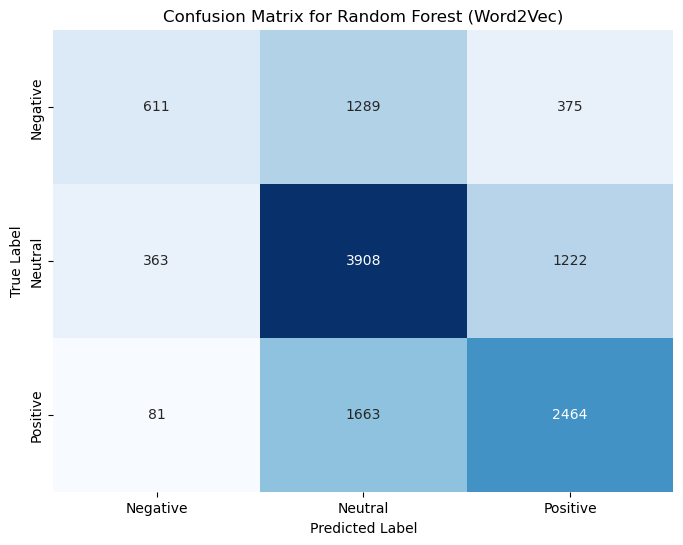

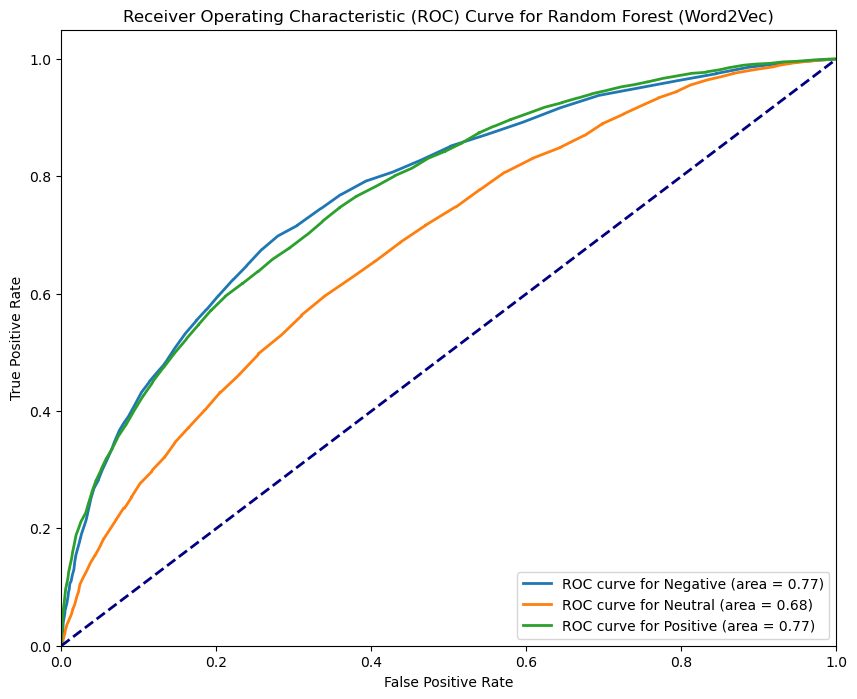

In [23]:
rf_w2v_trainer = ModelTrainer()
rf_w2v_trainer.train_model(X_train_w2v, y_train, model_type='random_forest')
rf_w2v_predictions = rf_w2v_trainer.predict(X_test_w2v)
rf_w2v_probabilities = rf_w2v_trainer.predict_proba(X_test_w2v)

#evaluate
evaluator.evaluate(y_test, rf_w2v_predictions, rf_w2v_probabilities, model_name="Random Forest (Word2Vec)")


In [24]:
rf_w2v_trainer.save_model(os.path.join(models_dir, 'random_forest_w2v_model_multiclass.pkl'))

Model saved to c:\Users\asus\OneDrive\Desktop\projects\sentiment_analysis_project\models\random_forest_w2v_model_multiclass.pkl


In [25]:
# sv_w2v_trainer = ModelTrainer()
# sv_w2v_trainer.train_model(X_train_w2v, y_train, model_type='svm')
# sv_w2v_predictions = sv_w2v_trainer.predict(X_test_w2v)
# sv_w2v_probabilities = sv_w2v_trainer.predict_proba(X_test_w2v)

# #evaluate
# evaluator.evaluate(y_test, sv_w2v_predictions, sv_w2v_probabilities, model_name="SVM (Word2Vec)")


In [26]:
# sv_w2v_trainer.save_model(os.path.join(models_dir, 'svm_w2v_model_multiclass.pkl'))